Monte Carlo Simulation

Suppose that you want to build a rainwater recapture system in Central Texas.  You believe that a 25000 gallon tank and a 3000 square foot roof capture area would be sufficient.     But then you ask yourself, how often will the volume in my storage tank reach zero?

You gather monthly rainfall data from here  https://www.weather.gov/wrh/Climate?wfo=ewx (Links to an external site.).  (For convenience, the result is attached   Download attached . You are only interested in data from 2000 through 2010.

You expect to use between 4000 and 5200 gallons of water monthly, as all of your appliances are low-flow, and you have xeriscaped the outdoors (zero water). 

You estimate that your system will be between 90-98 percent efficient in capturing rainfall, depending on the severity of the downfall. 

Note:  there are about 7.48 gallons of water in each cubic foot.

Start with 10000 gl in the tank.

Draw a systems model (e.g., IDEF0 or flowchart) for the rainwater harvesting system. Show the inputs, outputs, processes, etc.
Generate boxplots of monthly rainfall data. Code 'M' (marginal) as 0. You will use empirical sampling for each month. 
Using the rainfall distribution coupled with the distributions of consumption, storage capability, and efficiency, design a Monte Carlo simulation model  based on monthly rainfall versus monthly consumption. Run each iteration for 30 years.
Run 1000 iterations of this model. How well did 1000 iterations bracket the mean monthly water in the tank after accounting for usage?
Generate a histogram of the minimum gallons of water in the tank for each iteration run.  Why might this be useful?  What needs to be done to improve this simulation? Why?

In [ ]:
#The input is rainfall: 
#  (rainfall pattern, Histogram of the rainfall over the months, Dist from there + 
#  Capture efficiency, 90-98 percent, distribution Random Dist) * converted to Gallons 
#  Capture area : 3000 square foot
#  7.48 gallons of water in each cubic foot

#parameters are: 
#  water usage 4000 to 5200 gallons per month 
#  Peak volume : 25000
#  Starting vol : 10000 Gal

#output :
#    After usage, minimum gallons of water remaining (Mean too) over 30 years 
#    PLot these over 1000 simulation runs 


    
#Improve: Capture area could be expanded, varied 
#         We lose some initla rainwater, till the valve kicks off



In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

 

avg = 1
std_dev = .1
num_reps = 360 # 30 years 
num_simulations = 1000
rand_seed = 1234

#roulette_probs = np.random.normal(avg, std_dev, 10).round(2)

random.seed( rand_seed )

# Load the Dta, and clean the data 

df = pd.read_csv('rainfall-2.csv', sep=',')   
df

# replace M with 0 
df=df.replace(to_replace="M",value="0")
df
    


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Unnamed: 14
0,2000,1.09,1.27,0.42,1.7,1.42,4.52,0.92,0,1.90,7.26,0,1.10,0,NaN
1,2001,3.94,1.01,2.78,4.09,4.63,0.83,0.00,6.24,3.87,3.55,3.94,2.67,37.55,NaN
2,2002,0.39,0.39,1.54,2.43,1.29,0.00,7.79,1.08,6.87,7.11,2.38,3.74,35.01,NaN
3,2003,4.1,2.65,2.36,0.11,0.16,4.15,8.41,0.95,7.94,2.18,0.27,0.14,33.42,NaN
4,2004,2.65,1.77,4.31,8.58,2.61,10.28,2.57,4.72,1.44,4.94,7.5,0.07,51.44,NaN
5,2005,2.4,2.77,3.85,0.06,3.65,0.67,3.65,1.96,0.89,1.91,0.98,0.00,22.79,NaN
6,2006,0.63,0.47,1.16,0.94,2.30,0.66,0.90,0,5.31,1.79,0.26,2.60,17.02,NaN
7,2007,4.75,0.08,4.75,2.85,7.85,7.75,16.10,8.43,2.18,0.00,0.37,0.21,55.32,NaN
8,2008,0,0,1.49,0,0.45,0.00,2.74,0,0.00,0.00,0,0.04,0,NaN
9,2009,0.28,0.45,0,0.83,1.63,0.17,1.39,1.53,4.95,8.30,0.76,1.92,0,NaN


In [333]:
print(df. columns)

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Annual', 'Unnamed: 14'],
      dtype='object')


In [334]:
#df.hist(column='Jan')

#df['Jan']

#df['Jan'] = pd.to_numeric(df['Jan'], errors='coerce')

cols = df.columns.drop(['Year', 'Unnamed: 14'])

cols

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

print (df.dtypes)


Year             int64
Jan            float64
Feb            float64
Mar            float64
Apr            float64
May            float64
Jun            float64
Jul            float64
Aug            float64
Sep            float64
Oct            float64
Nov            float64
Dec            float64
Annual         float64
Unnamed: 14    float64
dtype: object


<AxesSubplot:>

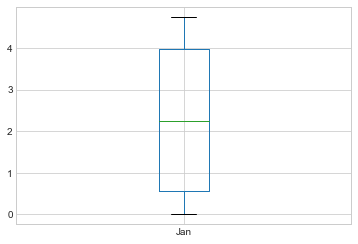

In [335]:
df.boxplot(column='Jan')



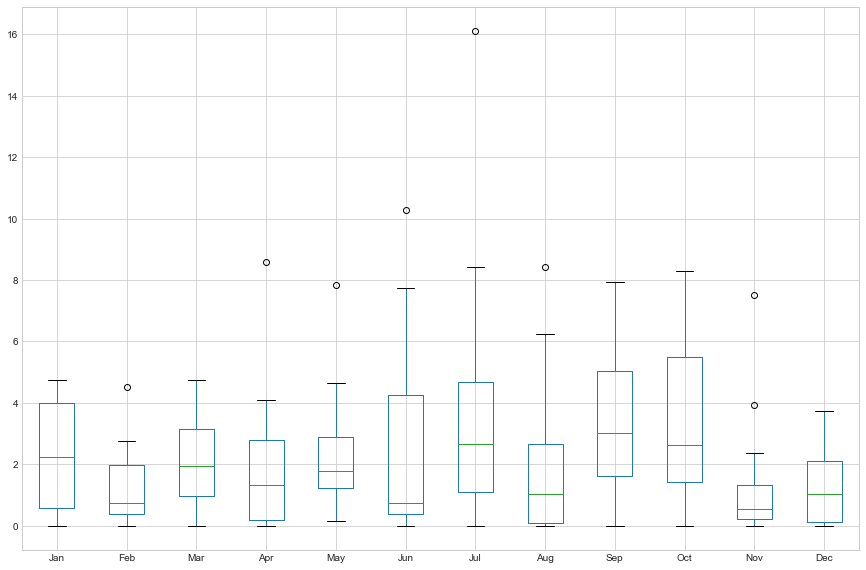

In [336]:
import matplotlib.pyplot as plt


#boxplot = df.boxplot(column=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

stud_bplt = df.boxplot(column = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], figsize=(15,10))

stud_bplt.plot()

plt.show()


#boxplot = df.boxplot()
#boxplot.plot()

#plt.show()


array([[<AxesSubplot:title={'center':'Jan'}>,
        <AxesSubplot:title={'center':'Feb'}>,
        <AxesSubplot:title={'center':'Mar'}>],
       [<AxesSubplot:title={'center':'Apr'}>,
        <AxesSubplot:title={'center':'May'}>,
        <AxesSubplot:title={'center':'Jun'}>],
       [<AxesSubplot:title={'center':'Jul'}>,
        <AxesSubplot:title={'center':'Aug'}>,
        <AxesSubplot:title={'center':'Sep'}>],
       [<AxesSubplot:title={'center':'Oct'}>,
        <AxesSubplot:title={'center':'Nov'}>,
        <AxesSubplot:title={'center':'Dec'}>]], dtype=object)

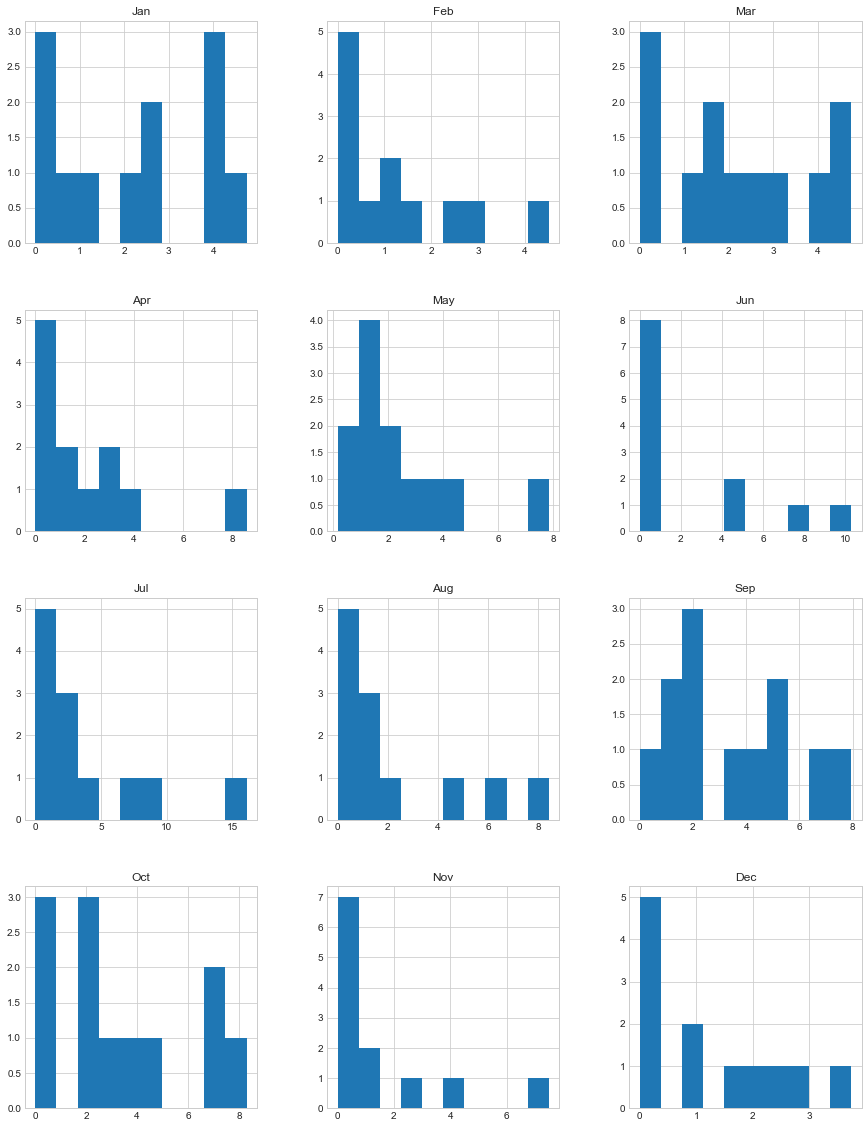

In [337]:

# Histogram of Month by Month Rain

df.hist( column=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], figsize=(15,20) )



In [338]:
print(df. columns)

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Annual', 'Unnamed: 14'],
      dtype='object')


In [339]:
#cols_months = cols.drop('Year')

#cols_months

#df_months = df.iloc[: , 1:]

df_months = df.drop(df.columns[[0, 13, 14]], axis = 1)


df_months


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.09,1.27,0.42,1.70,1.42,4.52,0.92,0.00,1.90,7.26,0.00,1.10
1,3.94,1.01,2.78,4.09,4.63,0.83,0.00,6.24,3.87,3.55,3.94,2.67
2,0.39,0.39,1.54,2.43,1.29,0.00,7.79,1.08,6.87,7.11,2.38,3.74
3,4.10,2.65,2.36,0.11,0.16,4.15,8.41,0.95,7.94,2.18,0.27,0.14
4,2.65,1.77,4.31,8.58,2.61,10.28,2.57,4.72,1.44,4.94,7.50,0.07
5,2.40,2.77,3.85,0.06,3.65,0.67,3.65,1.96,0.89,1.91,0.98,0.00
6,0.63,0.47,1.16,0.94,2.30,0.66,0.90,0.00,5.31,1.79,0.26,2.60
7,4.75,0.08,4.75,2.85,7.85,7.75,16.10,8.43,2.18,0.00,0.37,0.21
8,0.00,0.00,1.49,0.00,0.45,0.00,2.74,0.00,0.00,0.00,0.00,0.04
9,0.28,0.45,0.00,0.83,1.63,0.17,1.39,1.53,4.95,8.30,0.76,1.92


In [340]:
list_rainfalls = df_months.values.tolist()
print(list_rainfalls)

[[1.09, 1.27, 0.42, 1.7, 1.42, 4.52, 0.92, 0.0, 1.9, 7.26, 0.0, 1.1], [3.94, 1.01, 2.78, 4.09, 4.63, 0.83, 0.0, 6.24, 3.87, 3.55, 3.94, 2.67], [0.39, 0.39, 1.54, 2.43, 1.29, 0.0, 7.79, 1.08, 6.87, 7.11, 2.38, 3.74], [4.1, 2.65, 2.36, 0.11, 0.16, 4.15, 8.41, 0.95, 7.94, 2.18, 0.27, 0.14], [2.65, 1.77, 4.31, 8.58, 2.61, 10.28, 2.57, 4.72, 1.44, 4.94, 7.5, 0.07], [2.4, 2.77, 3.85, 0.06, 3.65, 0.67, 3.65, 1.96, 0.89, 1.91, 0.98, 0.0], [0.63, 0.47, 1.16, 0.94, 2.3, 0.66, 0.9, 0.0, 5.31, 1.79, 0.26, 2.6], [4.75, 0.08, 4.75, 2.85, 7.85, 7.75, 16.1, 8.43, 2.18, 0.0, 0.37, 0.21], [0.0, 0.0, 1.49, 0.0, 0.45, 0.0, 2.74, 0.0, 0.0, 0.0, 0.0, 0.04], [0.28, 0.45, 0.0, 0.83, 1.63, 0.17, 1.39, 1.53, 4.95, 8.3, 0.76, 1.92], [4.1, 4.51, 2.92, 2.77, 1.01, 0.84, 2.81, 0.15, 4.11, 0.25, 0.02, 0.99], [2.1, 0.31, 0.38, 0.21, 1.93, 0.43, 1.16, 0.12, 1.67, 3.04, 0.73, 1.64]]


In [341]:
# Create One list
rainfalls = np.concatenate(list_rainfalls).ravel()

rainfalls

array([ 1.09,  1.27,  0.42,  1.7 ,  1.42,  4.52,  0.92,  0.  ,  1.9 ,
        7.26,  0.  ,  1.1 ,  3.94,  1.01,  2.78,  4.09,  4.63,  0.83,
        0.  ,  6.24,  3.87,  3.55,  3.94,  2.67,  0.39,  0.39,  1.54,
        2.43,  1.29,  0.  ,  7.79,  1.08,  6.87,  7.11,  2.38,  3.74,
        4.1 ,  2.65,  2.36,  0.11,  0.16,  4.15,  8.41,  0.95,  7.94,
        2.18,  0.27,  0.14,  2.65,  1.77,  4.31,  8.58,  2.61, 10.28,
        2.57,  4.72,  1.44,  4.94,  7.5 ,  0.07,  2.4 ,  2.77,  3.85,
        0.06,  3.65,  0.67,  3.65,  1.96,  0.89,  1.91,  0.98,  0.  ,
        0.63,  0.47,  1.16,  0.94,  2.3 ,  0.66,  0.9 ,  0.  ,  5.31,
        1.79,  0.26,  2.6 ,  4.75,  0.08,  4.75,  2.85,  7.85,  7.75,
       16.1 ,  8.43,  2.18,  0.  ,  0.37,  0.21,  0.  ,  0.  ,  1.49,
        0.  ,  0.45,  0.  ,  2.74,  0.  ,  0.  ,  0.  ,  0.  ,  0.04,
        0.28,  0.45,  0.  ,  0.83,  1.63,  0.17,  1.39,  1.53,  4.95,
        8.3 ,  0.76,  1.92,  4.1 ,  4.51,  2.92,  2.77,  1.01,  0.84,
        2.81,  0.15,

In [342]:
# Assumption:
# The rains falls across the months is so random, we will just pick one from the list of rainfalls across months
# Randomly chose one value from this List for Each month
# Add 90-98% efficiency, chose a random value from 90 - 98, 

#  Capture area : 3000 square foot
#  7.48 gallons of water in each cubic foot



def getRainwaterVolMonth(capt) :
    rain_gallons = 0.0
    capture_efficiency = random.randint(90, 98)/100.0
    rain_gallons = (random.choice(rainfalls)/12 * capt * capture_efficiency) * 7.48
    #print( "Rain water in Gallons: %s" % (rain_gallons) )
    
    return rain_gallons

# Takes Seasonality into Account 
def getRainwaterVolMonthGivenMonth(i, capt) :
    rain_gallons = 0.0
    capture_efficiency = random.randint(90, 98)/100.0
    rainfall_val = random.choice( df_months.iloc[:,i%12] )
    
    rain_gallons = (rainfall_val/12 * capt * capture_efficiency) * 7.48
    #print( "Rain water in Gallons: %s" % (rain_gallons) )
    
    return rain_gallons


#  water usage 4000 to 5200 gallons per month, normal Dist (?)
def getWaterUsageMonth() :
    water_usage = 0.0
    water_usage = random.randint(4000, 5200)

    return water_usage



In [345]:
# Test the Function 
getRainwaterVolMonth(3000)

3233.23

In [346]:
# Test Water Usage
getWaterUsageMonth()


4171

In [347]:
# Test Seasonal Function
for n in range( 12 ) :
    getRainwaterVolMonthGivenMonth(n, 3000)



In [348]:
# This Simulation takes Seasonality into account
# The monthly samples are computes from the same month distribution over years
# For Example, January ranifall is sampled from all the January rainalls
# Over 30 years, 360 reps, find out the mean and minumum water values (rainwater_harvested - water_usage)

# When usage exceeds the tank will have 0 water, but we want to see what is water Shortage over time
# so I have kept the Shortage accumulative, instead 

init_vol = 10000
peak_capacity = 25000

num_reps = 360 # 30 years 
num_simulations = 1000
rand_seed = 1234

capture_area = 3000   

def runSimulationOne(capture_area) :
    retVal = dict();
    remainingWater = []
    remWater = init_vol
    for n in range( num_reps ) :
        remWater += getRainwaterVolMonthGivenMonth(n, capture_area) - getWaterUsageMonth()
        if remWater > peak_capacity :
            remWater = peak_capacity
        remainingWater.append(remWater)
        #print("Remaining Water : %s" % (remWater))
        if remWater <= 0 :
            remWater = 0
    
    # Print mean
    mean_val = np.mean(remainingWater)
    
    #Print Min
    min_val = np.min(remainingWater)
    
    retVal['Mean'] = mean_val
    retVal['Min'] = min_val
    
    return retVal




In [352]:
# Test, Run the Simulation 
val = runSimulationOne(capture_area)
val

{'Mean': 8254.503102777779, 'Min': -4814.081}

In [353]:
# Run this Simulation for 1000 times

mins = []
means = []

# Setting the Seed 
random.seed( rand_seed )

capture_area = 3000

for n in range( num_simulations ) :
    sim_val = runSimulationOne(capture_area)
    mins.append( sim_val['Min'] )
    means.append( sim_val['Mean'] )



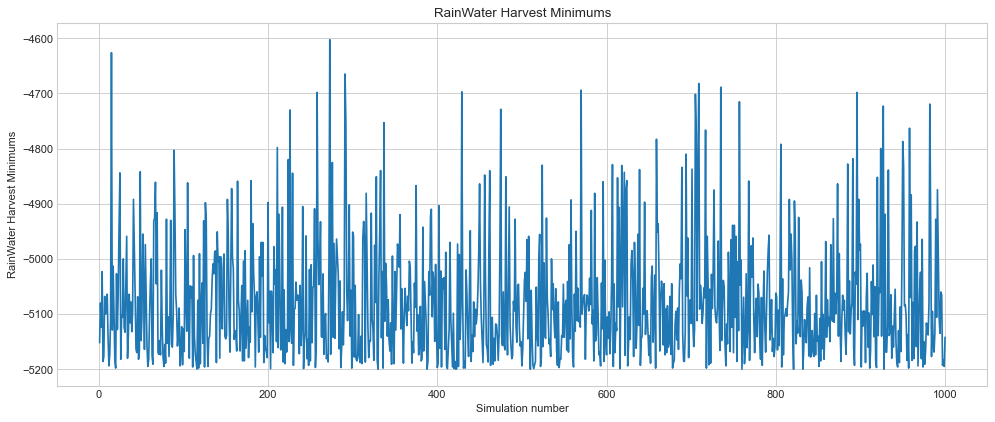

In [354]:
# Plot the Minimum and Means over each run

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn-whitegrid')

#fig = plt.figure()
#ax = plt.axes()

figure(figsize=(15, 6), dpi=80)

x = np.arange(1, num_simulations+1, dtype=int)
ax = plt.axes()
ax.plot(x, mins)
ax.set(xlabel='Simulation number', ylabel='RainWater Harvest Minimums',
       title='RainWater Harvest Minimums');


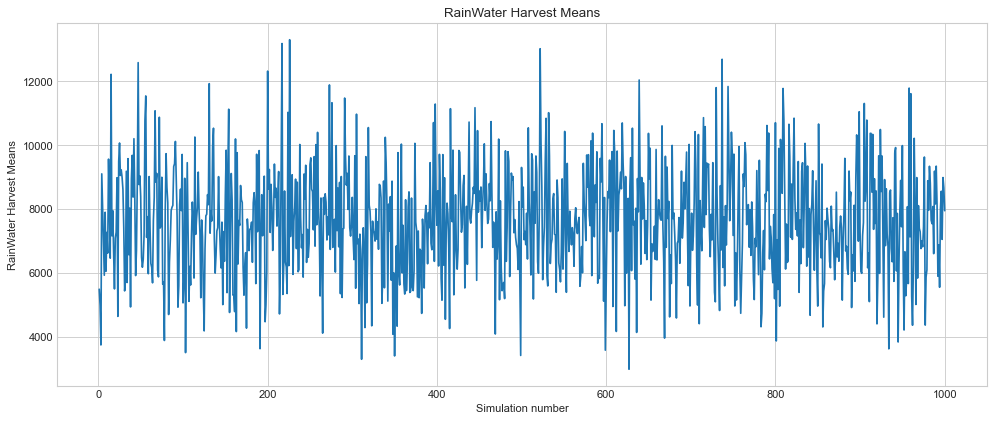

In [355]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn-whitegrid')

#fig = plt.figure()
#ax = plt.axes()

figure(figsize=(15, 6), dpi=80)

x = np.arange(1, num_simulations+1, dtype=int)
ax = plt.axes()
ax.plot(x, means)
ax.set(xlabel='Simulation number', ylabel='RainWater Harvest Means',
       title='RainWater Harvest Means');

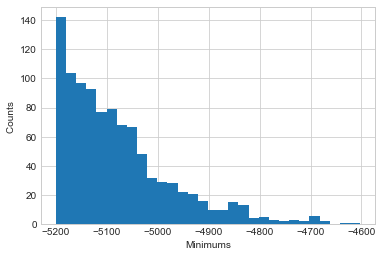

In [356]:
# Histogram of Minimum Water values over 1000 runs

plt.hist(mins, density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts ')
plt.xlabel('Minimums');


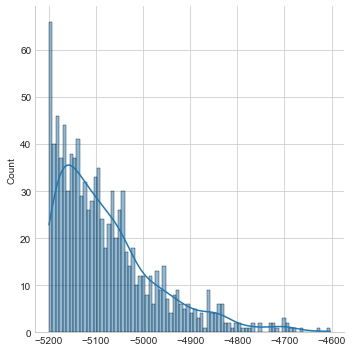

In [357]:

# Histogram of Minimum Water values over 1000 runs


import seaborn as sns
sns.displot(mins, bins=82, kde=True);


In [358]:
# This Simulation just randomly samples all months data
# For Example Jan rainfall, is sampled from all the 10 years of month by month data
# Not just January data
# Over 30 years, 360 reps, find out the mean and minumum water values (rainwater_harvested - water_usage)

init_vol = 10000
peak_capacity = 25000
capture_area = 3000

def runSimulationTwo(capture_area) :
    retVal = dict();
    remainingWater = []
    remWater = init_vol
    for n in range( num_reps ) :
        remWater += getRainwaterVolMonth(capture_area) - getWaterUsageMonth()
        if remWater > peak_capacity :
            remWater = peak_capacity
        remainingWater.append(remWater)
        #print("Remaining Water : %s" % (remWater))
        if remWater <= 0 :
            remWater = 0

    
    # Print mean
    mean_val = np.mean(remainingWater)
    
    #Print Min
    min_val = np.min(remainingWater)
    
    retVal['Mean'] = mean_val
    retVal['Min'] = min_val
    
    return retVal



In [359]:
# Run this Simulation for 1000 times

mins = []
means = []

# Setting the Seed 
random.seed( rand_seed )


for n in range( num_simulations ) :
    sim_val = runSimulationTwo(capture_area)
    mins.append( sim_val['Min'] )
    means.append( sim_val['Mean'] )



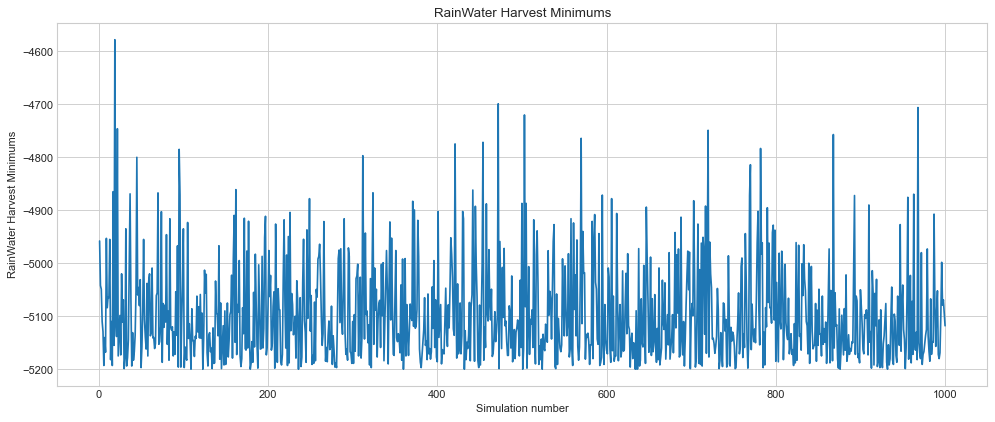

In [360]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn-whitegrid')

#fig = plt.figure()
#ax = plt.axes()

figure(figsize=(15, 6), dpi=80)

x = np.arange(1, num_simulations+1, dtype=int)
ax = plt.axes()
ax.plot(x, mins)
ax.set(xlabel='Simulation number', ylabel='RainWater Harvest Minimums',
       title='RainWater Harvest Minimums');


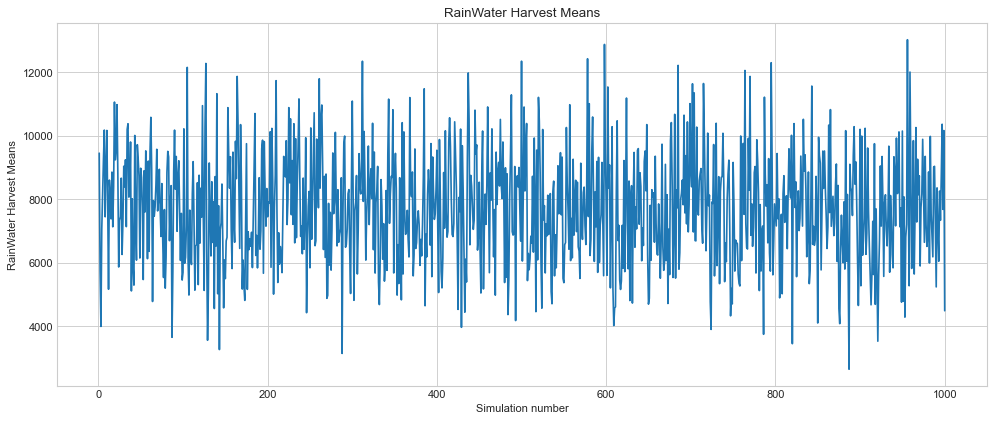

In [361]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn-whitegrid')

#fig = plt.figure()
#ax = plt.axes()

figure(figsize=(15, 6), dpi=80)

x = np.arange(1, num_simulations+1, dtype=int)
ax = plt.axes()
ax.plot(x, means)
ax.set(xlabel='Simulation number', ylabel='RainWater Harvest Means',
       title='RainWater Harvest Means');

In [362]:
# Run the Seasonal Simulation with Capture area 9000

# Run this Simulation for 1000 times

mins = []
means = []

# Setting the Seed 
random.seed( rand_seed )

capture_area = 9000

for n in range( num_simulations ) :
    sim_val = runSimulationOne(capture_area)
    mins.append( sim_val['Min'] )
    means.append( sim_val['Mean'] )


    

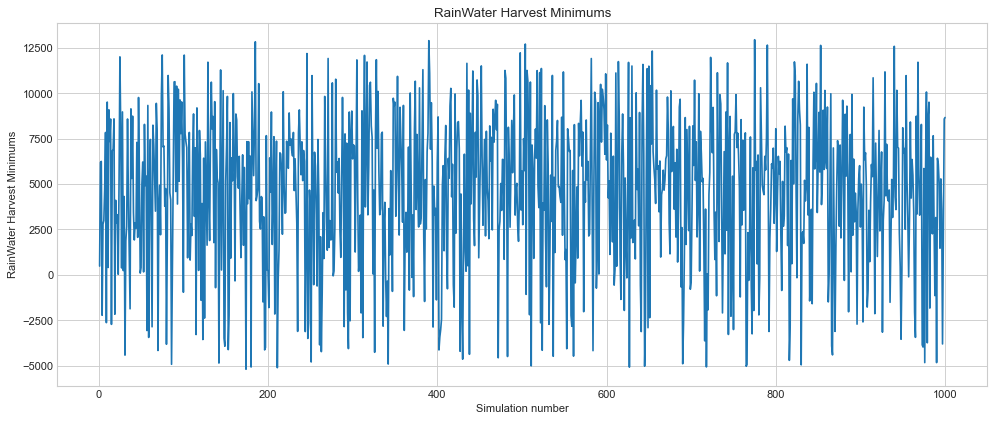

In [363]:
figure(figsize=(15, 6), dpi=80)

x = np.arange(1, num_simulations+1, dtype=int)
ax = plt.axes()
ax.plot(x, mins)
ax.set(xlabel='Simulation number', ylabel='RainWater Harvest Minimums',
       title='RainWater Harvest Minimums');

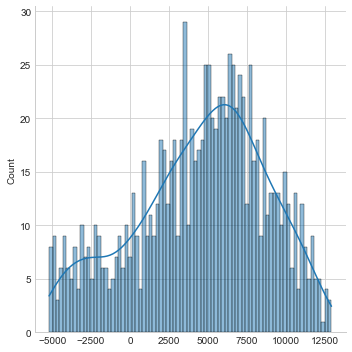

In [365]:
# Histogram of minimums
# Looks much better than before

import seaborn as sns
sns.displot(mins, bins=82, kde=True);



# Analysis
Here we have two Simulation results, one taking into account Seasonality and the other without Seasonality
Both Simlations came up worst case shortage of water by 5000 Gallons, over 30000 months 

Mean doesn't carry much value here, as we are worried about no water situation.

Suggestions : 
1. We need to increase the Capture area so we do not fall short of water
2. Current Tank size 25000 Gallons, anything beyond that is wasted. 
   We need to increase the Tank size to store more rain, to account for droughts 
3. Initial volume of water in the tank is 10000 Gal, we can increase so we do not fall short
